In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r'C:\Users\ayada\Downloads\ZOMATO.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
1,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
2,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
3,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089
4,2021-07-30,142.600006,142.699997,131.000000,133.500000,133.500000,88312522


In [4]:
df1=df.reset_index()['Close']
df1

0      140.649994
1      132.899994
2      131.199997
3      141.550003
4      133.500000
          ...    
245     53.950001
246     53.400002
247     53.500000
248     53.650002
249     47.599998
Name: Close, Length: 250, dtype: float64

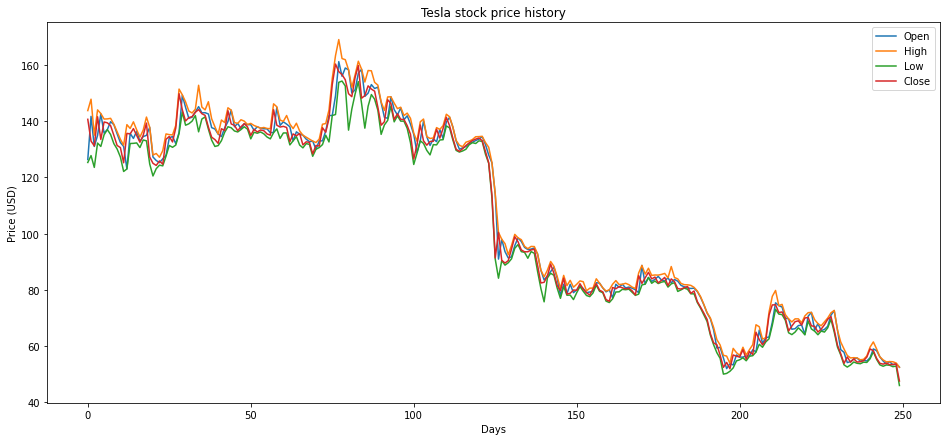

In [5]:
plt.figure(figsize = (16,7))
plt.plot(df["Open"])
plt.plot(df["High"])
plt.plot(df["Low"])
plt.plot(df["Close"])
plt.title('Tesla stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper right')
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(250, 1)

In [9]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
training_size,test_size

(162, 88)

In [13]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [19]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape)
print(y_train.shape)

(151, 10)
(151,)


In [20]:
print(X_test.shape)
print(ytest.shape)

(77, 10)
(77,)


In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_5 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
3/3 [==============================] - 21s 2s/step - loss: 0.4976 - val_loss: 0.0163
Epoch 2/100
3/3 [==============================] - 0s 64ms/step - loss: 0.3135 - val_loss: 0.0057
Epoch 3/100
3/3 [==============================] - 0s 64ms/step - loss: 0.1315 - val_loss: 0.0239
Epoch 4/100
3/3 [==============================] - 0s 62ms/step - loss: 0.0210 - val_loss: 0.0981
Epoch 5/100
3/3 [==============================] - 0s 65ms/step - loss: 0.0723 - val_loss: 0.0823
Epoch 6/100
3/3 [==============================] - 0s 64ms/step - loss: 0.0294 - val_loss: 0.0408
Epoch 7/100
3/3 [==============================] - 0s 64ms/step - loss: 0.0150 - val_loss: 0.0236
Epoch 8/100
3/3 [==============================] - 0s 62ms/step - loss: 0.0310 - val_loss: 0.0213
Epoch 9/100
3/3 [==============================] - 0s 66ms/step - loss: 0.0308 - val_loss: 0.0282
Epoch 10/100
3/3 [==============================] - 0s 63ms/step - loss: 0.0190 - val_loss: 0.0433
Epoch 11/100
3/3 [==

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.08208256254736856

In [30]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.06078855354176268

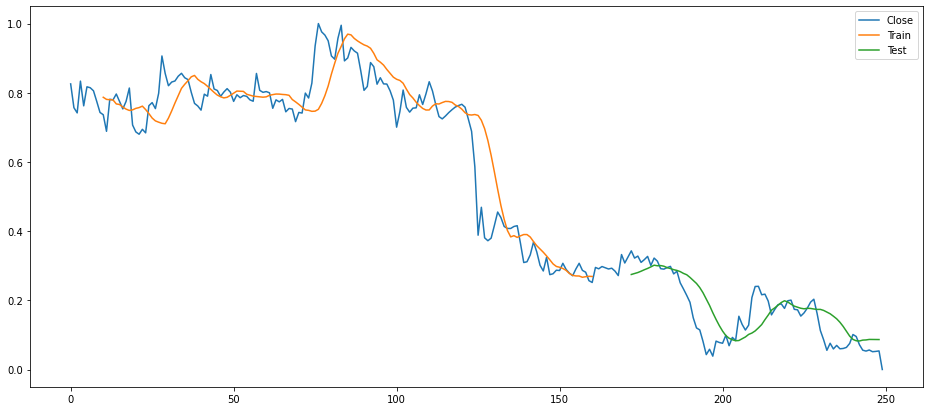

In [33]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize = (16,7))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Close','Train','Test'], loc='upper right')
plt.show()